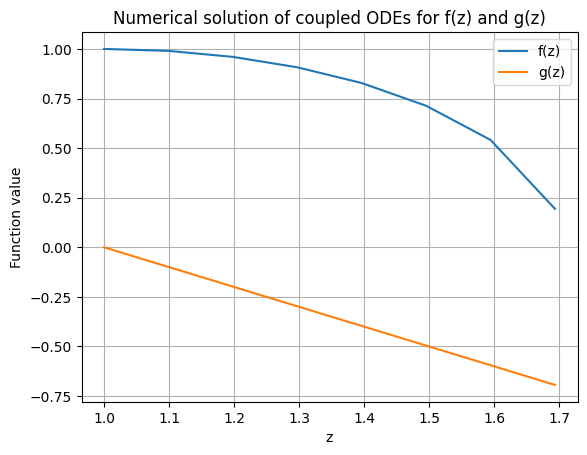

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
J = 1.0
theta = np.pi / 2  # for example
J_x = 1
u = 0.0  # try zero velocity soliton first

# Define the system of ODEs
def coupled_odes(z, y):
    f, g = y
    denom = u + 2 * J * np.sin(theta) * f
    if np.abs(denom) < 1e-8:  # avoid division by zero
        denom = 1e-8 * np.sign(denom)

    g_prime = (2 * (J * np.cos(theta) - J_x) / denom) * f
    f_prime = -4 * J * np.sin(theta) * (g * g_prime) / denom
    return [f_prime, g_prime]

# Initial conditions (can tune these)
f0 = 1
g0 = 0
y0 = [f0, g0]

# Integration domain
z_span = (1, 100)
z_eval = np.linspace(z_span[0], z_span[1], 1000)

# Solve the system
sol = solve_ivp(coupled_odes, z_span, y0, t_eval=z_eval, method='RK45', rtol=1e-8, atol=1e-8)

# Plot the results
plt.plot(sol.t, sol.y[0], label='f(z)')
plt.plot(sol.t, sol.y[1], label='g(z)')
plt.xlabel("z")
plt.ylabel("Function value")
plt.title("Numerical solution of coupled ODEs for f(z) and g(z)")
plt.legend()
plt.grid(True)
plt.show()